<a href="https://colab.research.google.com/github/utkarsh0702/Pytorch/blob/master/PyTorch3_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Using the GPU
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
transform= transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize(0.5,0.5)
])

#Download and load training and testing data
trainset= datasets.FashionMNIST('FashionMNIST/', download=True, train=True, transform=transform)
trainloader= torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset= datasets.MNIST('FashionMNIST/', download=True, train=False, transform=transform)
testloader= torch.utils.data.DataLoader(testset, batch_size=64, shuffle= True)

Extracting FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw


Extracting FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw


Extracting FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw


Extracting FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw
Processing...
Done!





/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting FashionMNIST/MNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/MNIST/raw


Extracting FashionMNIST/MNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/MNIST/raw


Extracting FashionMNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/MNIST/raw


Extracting FashionMNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/MNIST/raw
Processing...
Done!


In [0]:
from torch import nn, optim
import torch.nn.functional as F

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1= nn.Linear(784, 256)
    self.fc2= nn.Linear(256, 128)
    self.fc3= nn.Linear(128, 64)
    self.fc4= nn.Linear(64, 10)
    #Adding the dropout layer
    self.dropout= nn.Dropout(0.5)
  
  def forward(self, x):
    x= x.view(x.shape[0],-1)
    x= self.dropout(F.relu(self.fc1(x)))
    x= self.dropout(F.relu(self.fc2(x)))
    x= self.dropout(F.relu(self.fc3(x)))
    x= F.log_softmax(x, dim=1)
    return x

In [21]:
#Declaring the model, loss function and optimizer
model= Classifier()
loss_function= nn.NLLLoss()
optimizer= optim.SGD(model.parameters(), lr= 0.003)
model.to(device)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [22]:
epochs= 30
steps= 0
train_losses, test_losses= [],[]
for e in range(epochs):
  running_loss= 0
  for image, label in trainloader:
    optimizer.zero_grad()
    image, label= image.to(device), label.to(device)
    output= model.forward(image)
    loss= loss_function(output, label)
    loss.backward()
    optimizer.step()
    running_loss+= loss.item()
  
  train_losses.append(running_loss/ len(trainloader))
  test_loss=0
  accuracy=0
  # Turn off gradient
  with torch.no_grad():
    model.eval()  #stopping the dropout
    for image, label in testloader:
      image, label= image.to(device), label.to(device)
      output= model.forward(image)
      test_loss+= loss_function(output, label)
      ps= torch.exp(output)
      top_p, top_class= ps.topk(1, dim=1)

      equals= top_class==label.view(*top_class.shape)
      accuracy+= torch.mean(equals.type(torch.FloatTensor))
  
  test_losses.append(test_loss/ len(testloader))
  model.train()

  #Printing the details
  print("Epochs: {}/{}".format(e+1, epochs), "Training Loss: {}..".format(running_loss/ len(trainloader)), "Testing Loss: {}..".format(test_loss/ len(testloader)), "Test Accuracy: {}".format(accuracy/ len(testloader)))

Epochs: 1/30 Training Loss: 3.4882528286244567.. Testing Loss: 3.5155177116394043.. Test Accuracy: 0.07016322016716003
Epochs: 2/30 Training Loss: 3.010478179337882.. Testing Loss: 3.6335601806640625.. Test Accuracy: 0.0958399698138237
Epochs: 3/30 Training Loss: 2.8607657563203435.. Testing Loss: 3.750211477279663.. Test Accuracy: 0.1061902865767479
Epochs: 4/30 Training Loss: 2.7828272232877165.. Testing Loss: 3.812861919403076.. Test Accuracy: 0.10449840873479843
Epochs: 5/30 Training Loss: 2.7383576214694774.. Testing Loss: 3.8445112705230713.. Test Accuracy: 0.1021098718047142
Epochs: 6/30 Training Loss: 2.693746525341514.. Testing Loss: 3.8640522956848145.. Test Accuracy: 0.10459793359041214
Epochs: 7/30 Training Loss: 2.6677764982048635.. Testing Loss: 3.888634204864502.. Test Accuracy: 0.0990246832370758
Epochs: 8/30 Training Loss: 2.650867256147267.. Testing Loss: 3.9160056114196777.. Test Accuracy: 0.09872611612081528
Epochs: 9/30 Training Loss: 2.6241603203928037.. Testing L

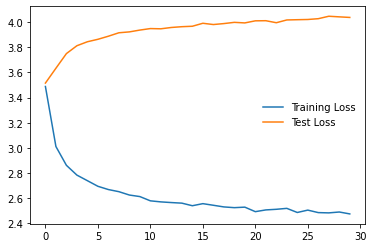

In [23]:
# Plotting the graph
plt.plot(train_losses, label= "Training Loss")
plt.plot(test_losses, label= "Test Loss")
plt.legend(frameon= False)
plt.show()